In [8]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [9]:
baby = pd.read_csv('/content/test.csv')
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [27]:
smoking_and_MaternalAge = baby[['Maternal Smoker', 'Maternal Age']]
smoking_and_MaternalAge

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [28]:
smoker = smoking_and_MaternalAge['Maternal Age'] [smoking_and_birthweight['Maternal Smoker'] == True]

In [29]:
non_smoker = smoking_and_MaternalAge['Maternal Age'] [smoking_and_birthweight['Maternal Smoker'] == False]

**1)Draw the histograms of the two distributions in the sample(2), and state your inferences(1).**

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96eec25550>,
      dtype=object)

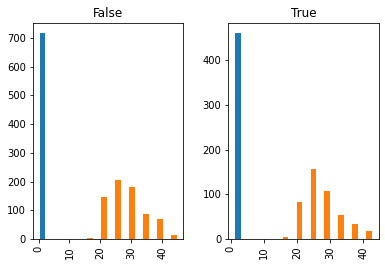

In [30]:
smoking_and_MaternalAge.hist(by ='Maternal Smoker')

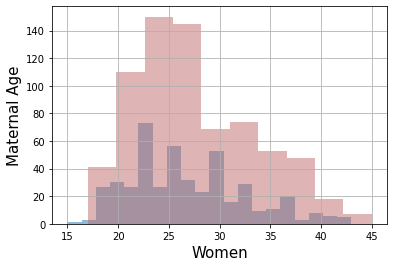

In [35]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
plt.show()

The distribution of the age of the babies born to mothers who smoked appears to be shifted slightly to the left of the distribution corresponding to non-smoking mothers. The age of the babies of the mothers who smoked seem lower, on average than the age of the babies of the non-smokers.

**2)Which statistical test would you employ?(2)**

In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

**3)State the Null and Alternative Hypothesis (1).**

**Null hypothesis**: In the population, the distribution of Maternal Age of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis**: In the population, the babies of the mothers who smoke have a lower Maternal Age, on average, than the babies of the non-smokers.


**4)What statistic do you recommend to apply for this case(2)?**

The alternative hypothesis compares the average Maternal Age of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order "average age of the smoking group 
−
 average age of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

**5)State the observed statistic(2)**

In [32]:
means_table = smoking_and_MaternalAge.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [33]:
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [34]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

The observed value of the test statistic is about 
**-0.807**
 ounces.

**6)Simulate the test statistic under the Null that will help make the decision(3).**

In [37]:
differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_MaternalAge = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_MaternalAge.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_MaternalAge.assign(shuffled_age=shuffled_age.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
    differences[i] = difference
differences

array([ 0.40702043,  0.62880997,  0.18165364, ..., -0.27265719,
       -0.08664016, -0.24761644])

In [38]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.407020
1,0.628810
2,0.181654
3,0.263930
4,0.231735
...,...
4995,0.095800
4996,0.110109
4997,-0.272657
4998,-0.086640


**7)Draw a histogram to depict what the model of random selection predicts about the statistic.(3)**

Observed Difference: -0.8076725017901509


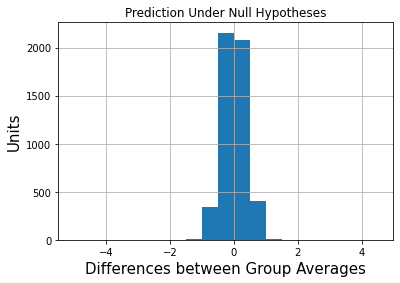

In [39]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

**8)Evaluate the empirical p-value of the test(3).**

In [40]:
p_val = np.count_nonzero(differences <= observed_difference)/differences.size
p_val

0.011

Emprical p value = 0.011

So the p_val < alpha(0.05), p is significant and null hypothesis can be rejected

**9)What is the outcome of your analysis?**

p is significant and null hypothesis can be rejected